<a href="https://colab.research.google.com/github/ThiagoLozano/Alura_Imersao-de-Dados-2-Edicao/blob/main/Aula002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importa a Biblioteca Pandas e Matplotlib.
import pandas as pd
import matplotlib.pyplot as plt

# Pega a fonte dos dados.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Cria o objeto 'dados'.
dados = pd.read_csv(fonte)

In [3]:
# Retorna o nome das colunas.
for c in dados.columns:
  print(c, end=' | ')

NU_INSCRICAO | NU_ANO | CO_MUNICIPIO_RESIDENCIA | NO_MUNICIPIO_RESIDENCIA | CO_UF_RESIDENCIA | SG_UF_RESIDENCIA | NU_IDADE | TP_SEXO | TP_ESTADO_CIVIL | TP_COR_RACA | TP_NACIONALIDADE | CO_MUNICIPIO_NASCIMENTO | NO_MUNICIPIO_NASCIMENTO | CO_UF_NASCIMENTO | SG_UF_NASCIMENTO | TP_ST_CONCLUSAO | TP_ANO_CONCLUIU | TP_ESCOLA | TP_ENSINO | IN_TREINEIRO | CO_ESCOLA | CO_MUNICIPIO_ESC | NO_MUNICIPIO_ESC | CO_UF_ESC | SG_UF_ESC | TP_DEPENDENCIA_ADM_ESC | TP_LOCALIZACAO_ESC | TP_SIT_FUNC_ESC | IN_BAIXA_VISAO | IN_CEGUEIRA | IN_SURDEZ | IN_DEFICIENCIA_AUDITIVA | IN_SURDO_CEGUEIRA | IN_DEFICIENCIA_FISICA | IN_DEFICIENCIA_MENTAL | IN_DEFICIT_ATENCAO | IN_DISLEXIA | IN_DISCALCULIA | IN_AUTISMO | IN_VISAO_MONOCULAR | IN_OUTRA_DEF | IN_GESTANTE | IN_LACTANTE | IN_IDOSO | IN_ESTUDA_CLASSE_HOSPITALAR | IN_SEM_RECURSO | IN_BRAILLE | IN_AMPLIADA_24 | IN_AMPLIADA_18 | IN_LEDOR | IN_ACESSO | IN_TRANSCRICAO | IN_LIBRAS | IN_TEMPO_ADICIONAL | IN_LEITURA_LABIAL | IN_MESA_CADEIRA_RODAS | IN_MESA_CADEIRA_SEPARAD

In [9]:
# Retorna os inscritos menores ou iguais a 14 anos e sua residência.
dados.query("NU_IDADE <= 14")['SG_UF_RESIDENCIA'].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
DF     4
AM     4
MT     4
SE     3
PR     3
TO     3
RO     2
SC     2
AL     2
AP     1
RJ     1
ES     1
MS     1
RS     1
AC     1
RN     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [12]:
# Retorna a proporção da quantidade de inscritos por estado residencial.
dados.query("NU_IDADE <= 14")['SG_UF_RESIDENCIA'].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
DF    0.027586
AM    0.027586
MT    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
RO    0.013793
SC    0.013793
AL    0.013793
AP    0.006897
RJ    0.006897
ES    0.006897
MS    0.006897
RS    0.006897
AC    0.006897
RN    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

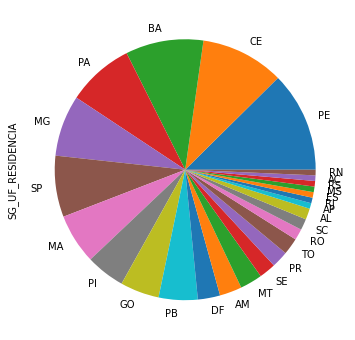

In [29]:
# Retorna um gráfico de pizza para a proporção de inscritos por estado residente.
alunos_menor_quatorze = dados.query("NU_IDADE <= 14")
alunos_menor_quatorze['SG_UF_RESIDENCIA'].value_counts().plot.pie(figsize=(10,6))

Text(0, 0.5, 'Percetagem')

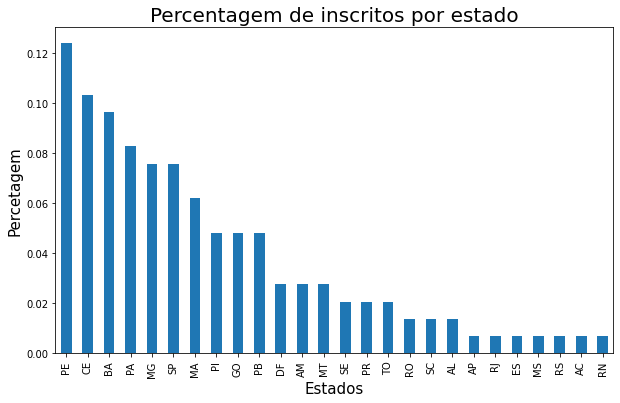

In [38]:
# Retorna um gráfico de barra para a proporção de inscritos por estado residente.
alunos_menor_quatorze['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar(figsize=(10,6))
plt.title('Percentagem de inscritos por estado',fontdict={'fontsize':20})                         # Título do gráfico.
plt.xlabel('Estados', fontdict={'fontsize':15})                                                   # Título da coordenada X.
plt.ylabel('Percetagem', fontdict={'fontsize':15})                                                # Título da coordenada Y.

Mega Desafio: Pegar a mostra completa dos alunos de 13 e 14 anos.

Desafio001: Aumentar a amostra para alunos menor de idade e comparar a proporção dos estados.

In [32]:
# Importa a Biblioteca Seaborn.
import seaborn as sns

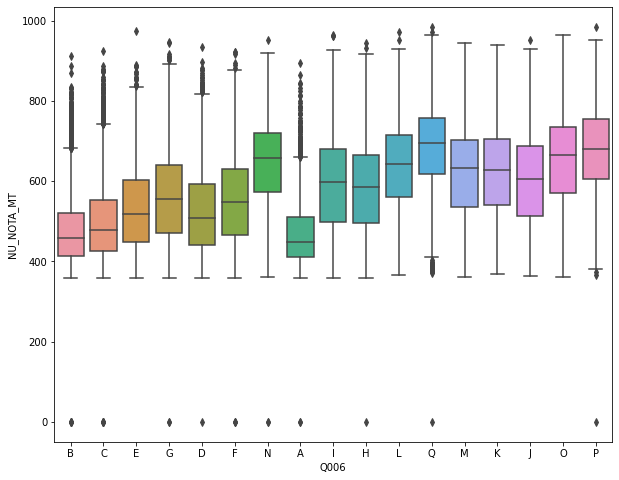

In [35]:
# Retorna um BloxPlot.
plt.figure(figsize=(10,8))                            # Configura o tamanho do gráfico pelo Matplotlib.
sns.boxplot(x='Q006', y='NU_NOTA_MT', data = dados)   # Cria o gráfico pelo Seaborn.